In [27]:
import tensorflow as tf

In [28]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [29]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8982,), (8982,), (2246,), (2246,))

In [30]:
print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [31]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(118, 90, 212)

In [32]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
len(pad_x_train[50])

500

In [33]:
import numpy as np

In [34]:
np.unique(y_train).shape

(46,)

# Make Model

In [35]:
model = tf.keras.models.Sequential()

In [36]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000, output_dim=24))
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [37]:
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3, batch_size=256)
# hist = model.fit(pad_x_train, y_train, epochs=5, validation_split=0.3, batch_size=128)

Epoch 1/100
25/25 [==============================] - 22s 752ms/step - loss: 3.7479 - acc: 0.3057 - val_loss: 3.5032 - val_acc: 0.3532
Epoch 2/100
25/25 [==============================] - 18s 710ms/step - loss: 3.2212 - acc: 0.3510 - val_loss: 2.9667 - val_acc: 0.3532
Epoch 3/100
25/25 [==============================] - 18s 714ms/step - loss: 2.8237 - acc: 0.3510 - val_loss: 2.6428 - val_acc: 0.3532
Epoch 4/100
25/25 [==============================] - 18s 714ms/step - loss: 2.5842 - acc: 0.3510 - val_loss: 2.4855 - val_acc: 0.3532
Epoch 5/100
25/25 [==============================] - 18s 713ms/step - loss: 2.4826 - acc: 0.3510 - val_loss: 2.4252 - val_acc: 0.3532
Epoch 6/100
25/25 [==============================] - 18s 715ms/step - loss: 2.4445 - acc: 0.3510 - val_loss: 2.4033 - val_acc: 0.3532
Epoch 7/100
25/25 [==============================] - 18s 718ms/step - loss: 2.4293 - acc: 0.3510 - val_loss: 2.3929 - val_acc: 0.3532
Epoch 8/100
25/25 [==============================] - 18s 715ms

# Evaluation

In [38]:
model.evaluate(pad_x_train, y_train)

281/281 [==============================] - 18s 63ms/step - loss: 1.4032 - acc: 0.5460


[1.4032166004180908, 0.5459808707237244]

In [39]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [40]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [41]:
pad_make_x = pad_make(x_test)

In [42]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 5s 65ms/step - loss: 2.2039 - acc: 0.4252


[2.203883171081543, 0.42520034313201904]

In [43]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 5s 67ms/step - loss: 2.2039 - acc: 0.4252


[2.203883171081543, 0.42520034313201904]

In [44]:
import matplotlib.pyplot as plt

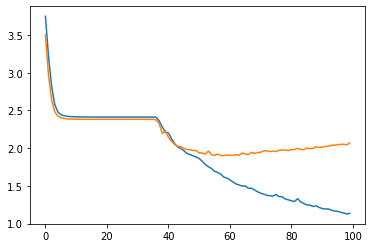

In [45]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

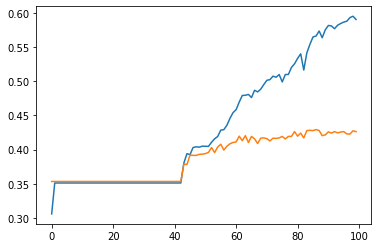

In [46]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

In [47]:
from sklearn.metrics import classification_report

In [48]:
y_train_pred = model.predict(pad_x_train)

In [49]:
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(8982,)

In [ ]:
print(classification_report(y_train, y_pred))

test

In [60]:
y_test_pred = model.predict(pad_x_test)

In [61]:
y_pred2 = np.argmax(y_test_pred, axis=1)

In [62]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.38      0.32      0.35       105
           2       0.04      0.10      0.06        20
           3       0.61      0.94      0.74       813
           4       0.00      0.00      0.00       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.13      0.13      0.13        30
          11       0.16      0.36      0.22        83
          12       0.00      0.00      0.00        13
          13       0.07      0.16      0.09        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.21      0.41      0.28        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
